100%|██████████| 36830/36830 [00:03<00:00, 11676.37it/s]


Loaded 36829 JSON files.


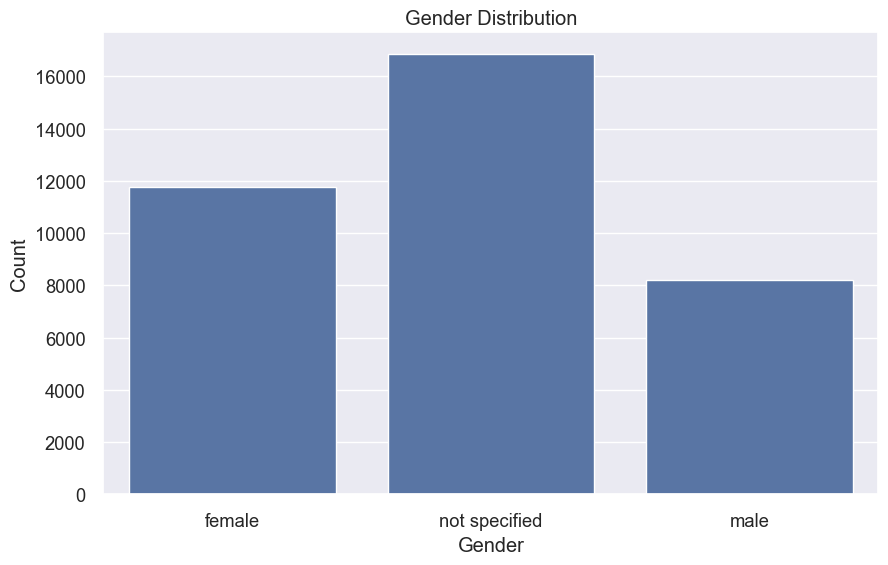

Gender Distribution:
female: 11760 (31.93%)
not specified: 16845 (45.74%)
male: 8224 (22.33%)


In [1]:
# Medical Data Analysis

## Import Libraries and Set Up

import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from tqdm import tqdm

# Set the style for plots
plt.style.use('seaborn-v0_8')
sns.set(font_scale=1.2)

## Helper Functions

def load_json_files(path):
    """Load all JSON files from a given directory."""
    data = []
    for filename in tqdm(os.listdir(path)):
        if filename.endswith('.json'):
            with open(os.path.join(path, filename), 'r') as f:
                data.append(json.load(f))
    return data

def safe_get(dictionary, keys, default=None):
    """Safely get a value from a nested dictionary."""
    for key in keys:
        if isinstance(dictionary, dict):
            dictionary = dictionary.get(key, {})
        else:
            return default
    return dictionary if dictionary != {} else default

def clean_list(lst):
    """Remove empty strings and non-string items from a list."""
    return [item for item in lst if item and isinstance(item, str) and item.strip()]

## Load Data

path = 'Preprocessing/Fix structure/rows'
data = load_json_files(path)
print(f"Loaded {len(data)} JSON files.")

## Gender Distribution Analysis

gender_counts = Counter(safe_get(item, ['gender', 'type'], 'Unknown') for item in data if safe_get(item, ['gender', 'type']))

plt.figure(figsize=(10, 6))
sns.barplot(x=list(gender_counts.keys()), y=list(gender_counts.values()))
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

print("Gender Distribution:")
for gender, count in gender_counts.items():
    print(f"{gender}: {count} ({count/len(data)*100:.2f}%)")

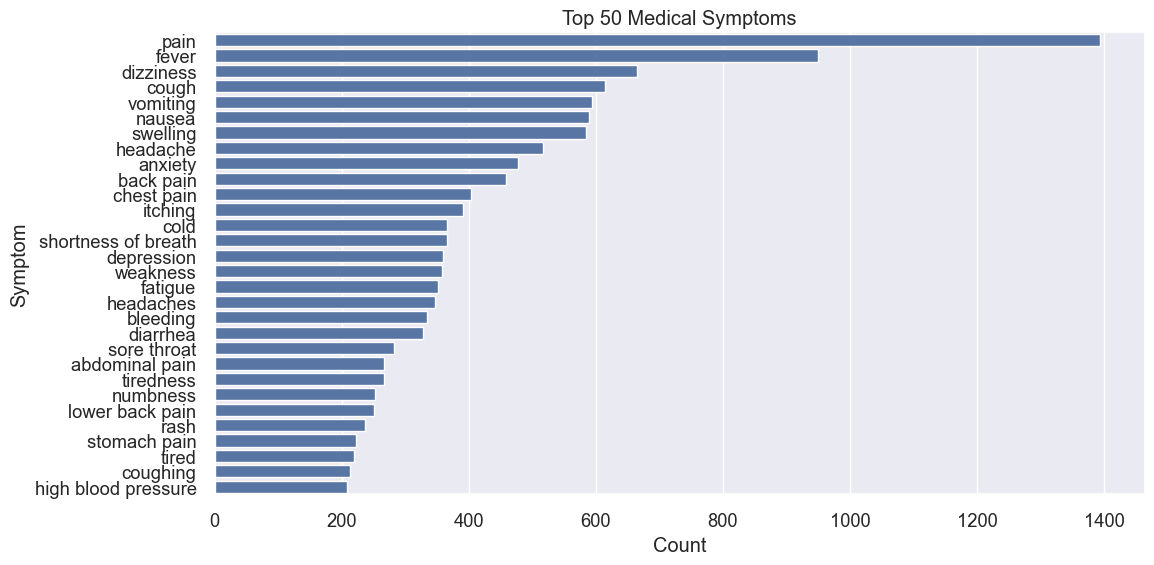

Top 30 Medical Symptoms:
pain: 1394 (3.79%)
fever: 949 (2.58%)
dizziness: 664 (1.80%)
cough: 614 (1.67%)
vomiting: 594 (1.61%)
nausea: 590 (1.60%)
swelling: 584 (1.59%)
headache: 517 (1.40%)
anxiety: 477 (1.30%)
back pain: 458 (1.24%)
chest pain: 403 (1.09%)
itching: 391 (1.06%)
cold: 366 (0.99%)
shortness of breath: 365 (0.99%)
depression: 360 (0.98%)
weakness: 358 (0.97%)
fatigue: 352 (0.96%)
headaches: 347 (0.94%)
bleeding: 335 (0.91%)
diarrhea: 328 (0.89%)
sore throat: 282 (0.77%)
abdominal pain: 267 (0.72%)
tiredness: 266 (0.72%)
numbness: 253 (0.69%)
lower back pain: 251 (0.68%)
rash: 237 (0.64%)
stomach pain: 222 (0.60%)
tired: 220 (0.60%)
coughing: 213 (0.58%)
high blood pressure: 208 (0.56%)


In [4]:

## Top Medical Symptoms Analysis

all_symptoms = []
for item in data:
    categories = safe_get(item, ['categories'], [])
    for cat in categories:
        symptoms = clean_list(safe_get(cat, ['medical_symptoms'], []))
        all_symptoms.extend(symptoms)

symptom_counts = Counter(all_symptoms)
top_symptoms = dict(symptom_counts.most_common(30))

plt.figure(figsize=(12, 6))
sns.barplot(x=list(top_symptoms.values()), y=list(top_symptoms.keys()))
plt.title('Top 50 Medical Symptoms')
plt.xlabel('Count')
plt.ylabel('Symptom')
plt.show()

print("Top 30 Medical Symptoms:")
for symptom, count in top_symptoms.items():
    print(f"{symptom}: {count} ({count/len(data)*100:.2f}%)")


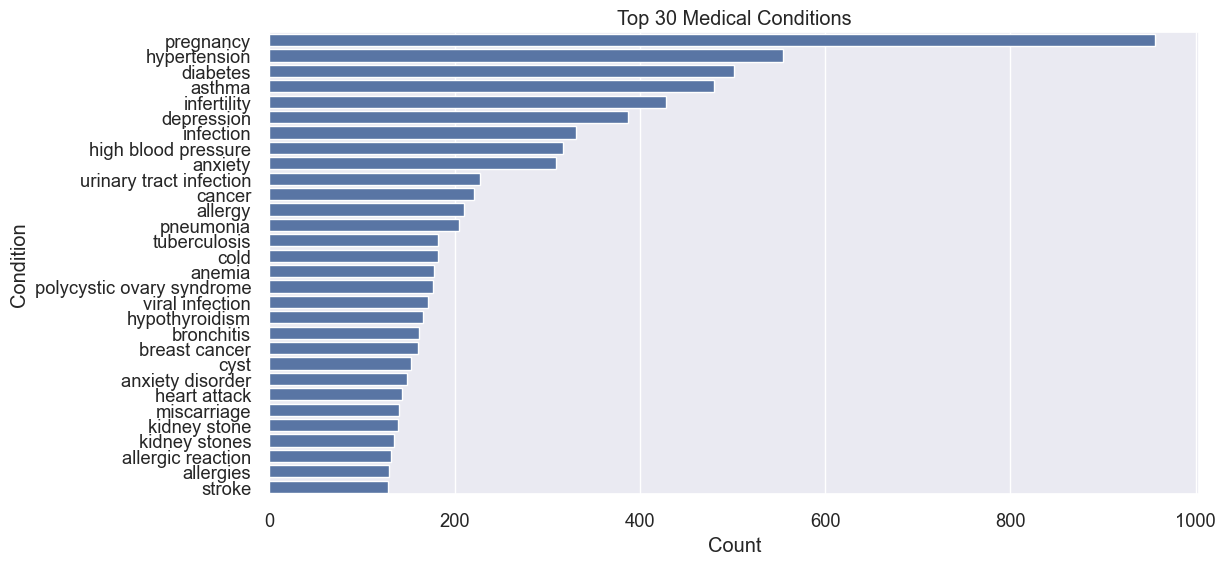

Top 30 Medical Conditions:
pregnancy: 956 (2.60%)
hypertension: 555 (1.51%)
diabetes: 502 (1.36%)
asthma: 480 (1.30%)
infertility: 428 (1.16%)
depression: 387 (1.05%)
infection: 331 (0.90%)
high blood pressure: 317 (0.86%)
anxiety: 310 (0.84%)
urinary tract infection: 227 (0.62%)
cancer: 221 (0.60%)
allergy: 210 (0.57%)
pneumonia: 205 (0.56%)
tuberculosis: 182 (0.49%)
cold: 182 (0.49%)
anemia: 178 (0.48%)
polycystic ovary syndrome: 177 (0.48%)
viral infection: 171 (0.46%)
hypothyroidism: 166 (0.45%)
bronchitis: 162 (0.44%)
breast cancer: 161 (0.44%)
cyst: 153 (0.42%)
anxiety disorder: 149 (0.40%)
heart attack: 143 (0.39%)
miscarriage: 140 (0.38%)
kidney stone: 139 (0.38%)
kidney stones: 135 (0.37%)
allergic reaction: 131 (0.36%)
allergies: 129 (0.35%)
stroke: 128 (0.35%)


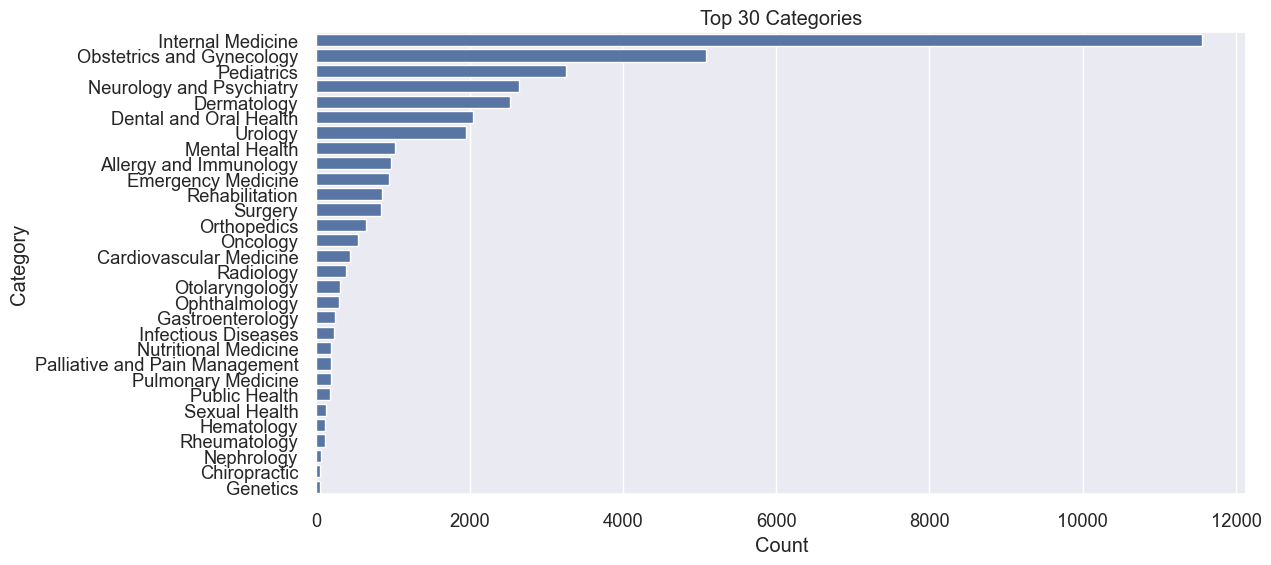

Top 30 Categories:
Internal Medicine: 11557 (31.38%)
Obstetrics and Gynecology: 5084 (13.80%)
Pediatrics: 3252 (8.83%)
Neurology and Psychiatry: 2647 (7.19%)
Dermatology: 2524 (6.85%)
Dental and Oral Health: 2039 (5.54%)
Urology: 1952 (5.30%)
Mental Health: 1026 (2.79%)
Allergy and Immunology: 980 (2.66%)
Emergency Medicine: 942 (2.56%)
Rehabilitation: 852 (2.31%)
Surgery: 846 (2.30%)
Orthopedics: 651 (1.77%)
Oncology: 541 (1.47%)
Cardiovascular Medicine: 441 (1.20%)
Radiology: 389 (1.06%)
Otolaryngology: 310 (0.84%)
Ophthalmology: 301 (0.82%)
Gastroenterology: 242 (0.66%)
Infectious Diseases: 226 (0.61%)
Nutritional Medicine: 191 (0.52%)
Palliative and Pain Management: 187 (0.51%)
Pulmonary Medicine: 186 (0.51%)
Public Health: 178 (0.48%)
Sexual Health: 120 (0.33%)
Hematology: 110 (0.30%)
Rheumatology: 109 (0.30%)
Nephrology: 64 (0.17%)
Chiropractic: 49 (0.13%)
Genetics: 48 (0.13%)


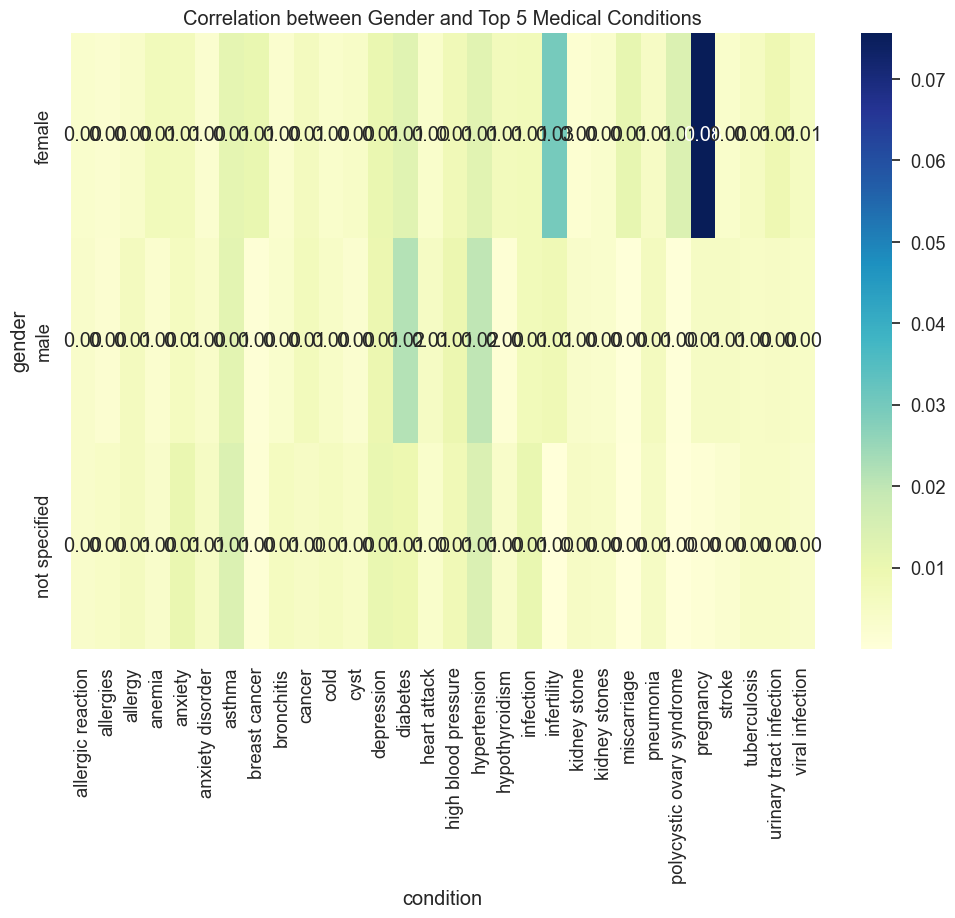

Correlation between Gender and Top 5 Medical Conditions:
condition      allergic reaction  allergies   allergy    anemia   anxiety  \
gender                                                                      
female                  0.003146   0.002551  0.004167  0.007398  0.007143   
male                    0.003769   0.002310  0.006323  0.002797  0.006080   
not specified           0.003681   0.004512  0.006352  0.003681  0.010211   

condition      anxiety disorder    asthma  breast cancer  bronchitis  \
gender                                                                 
female                 0.002466  0.011735       0.010544    0.002891   
male                   0.004134  0.011916       0.000973    0.003161   
not specified          0.005105  0.014010       0.001425    0.005996   

condition        cancer  ...  kidney stone  kidney stones  miscarriage  \
gender                   ...                                             
female         0.006378  ...      0.002126      

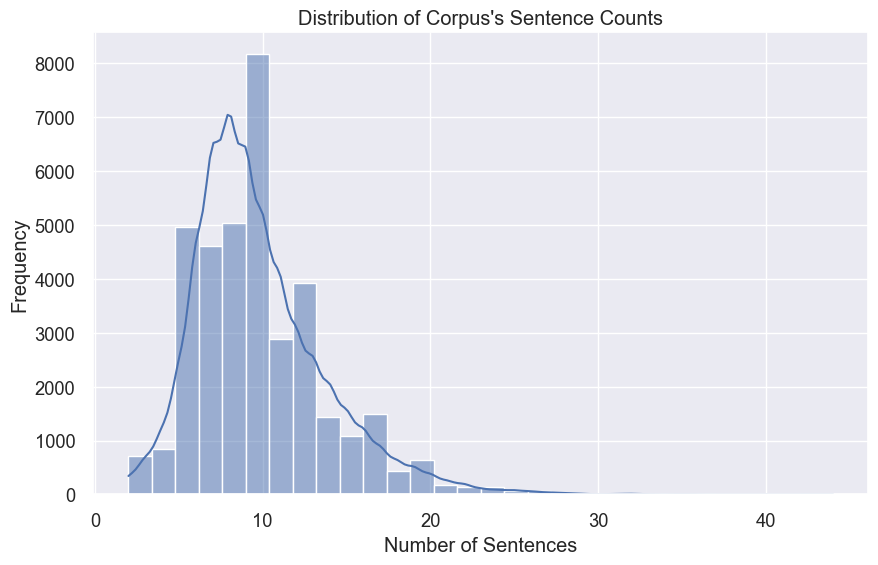

Average number of sentences in corpus: 9.75
Median number of sentences in corpus: 9.00
Min number of sentences: 2
Max number of sentences: 44


In [5]:

## Top Medical Conditions Analysis

all_conditions = []
for item in data:
    categories = safe_get(item, ['categories'], [])
    for cat in categories:
        conditions = clean_list(safe_get(cat, ['medical_conditions'], []))
        all_conditions.extend(conditions)

condition_counts = Counter(all_conditions)
top_conditions = dict(condition_counts.most_common(30))

plt.figure(figsize=(12, 6))
sns.barplot(x=list(top_conditions.values()), y=list(top_conditions.keys()))
plt.title('Top 30 Medical Conditions')
plt.xlabel('Count')
plt.ylabel('Condition')
plt.show()

print("Top 30 Medical Conditions:")
for condition, count in top_conditions.items():
    print(f"{condition}: {count} ({count/len(data)*100:.2f}%)")

## Category Distribution Analysis

all_categories = clean_list([cat['name'] for item in data for cat in safe_get(item, ['categories'], [])])
category_counts = Counter(all_categories)
top_categories = dict(category_counts.most_common(30))

plt.figure(figsize=(12, 6))
sns.barplot(x=list(top_categories.values()), y=list(top_categories.keys()))
plt.title('Top 30 Categories')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

print("Top 30 Categories:")
for category, count in top_categories.items():
    print(f"{category}: {count} ({count/len(data)*100:.2f}%)")

## Correlation between Gender and Top Medical Conditions

def get_conditions(item):
    """Get all unique medical conditions for an item."""
    return set(clean_list([condition for cat in safe_get(item, ['categories'], []) 
                           for condition in safe_get(cat, ['medical_conditions'], [])]))

top_5_conditions = set(dict(condition_counts.most_common(30)).keys())

gender_condition_data = []
for item in data:
    gender = safe_get(item, ['gender', 'type'])
    if gender:
        conditions = get_conditions(item)
        for condition in top_5_conditions:
            gender_condition_data.append({'gender': gender, 'condition': condition, 'has_condition': condition in conditions})

df = pd.DataFrame(gender_condition_data)
pivot_table = pd.pivot_table(df, values='has_condition', index=['gender'], columns=['condition'], aggfunc='mean')

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Correlation between Gender and Top 5 Medical Conditions')
plt.show()

print("Correlation between Gender and Top 5 Medical Conditions:")
print(pivot_table)

## Preprocessed Review Sentence Analysis

sentence_counts = [len(clean_list(safe_get(item, ['preprocessed_review'], []))) for item in data]

plt.figure(figsize=(10, 6))
sns.histplot(sentence_counts, kde=True, bins=30)
plt.title('Distribution of Corpus\'s Sentence Counts')
plt.xlabel('Number of Sentences')
plt.ylabel('Frequency')
plt.show()

print(f"Average number of sentences in corpus: {sum(sentence_counts) / len(sentence_counts):.2f}")
print(f"Median number of sentences in corpus: {pd.Series(sentence_counts).median():.2f}")
print(f"Min number of sentences: {min(sentence_counts)}")
print(f"Max number of sentences: {max(sentence_counts)}")

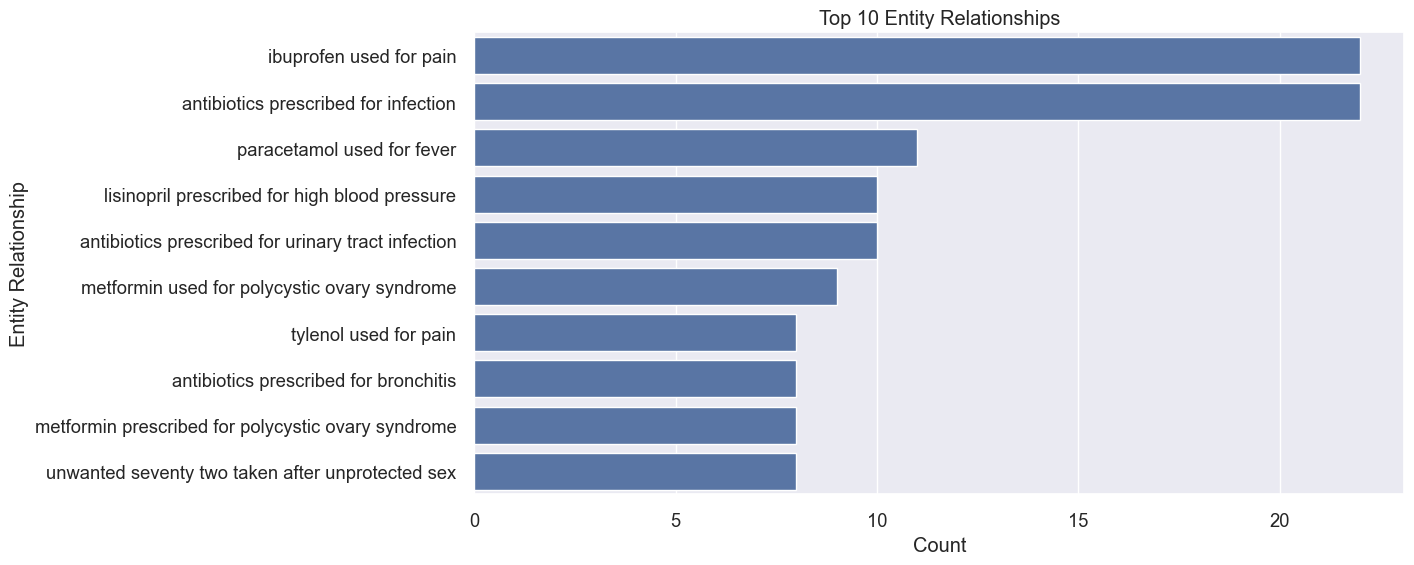

Top 10 Entity Relationships:
ibuprofen used for pain: 22 (0.06%)
antibiotics prescribed for infection: 22 (0.06%)
paracetamol used for fever: 11 (0.03%)
lisinopril prescribed for high blood pressure: 10 (0.03%)
antibiotics prescribed for urinary tract infection: 10 (0.03%)
metformin used for polycystic ovary syndrome: 9 (0.02%)
tylenol used for pain: 8 (0.02%)
antibiotics prescribed for bronchitis: 8 (0.02%)
metformin prescribed for polycystic ovary syndrome: 8 (0.02%)
unwanted seventy two taken after unprotected sex: 8 (0.02%)


In [6]:
## Top Entity Relationships Analysis

all_relationships = []
for item in data:
    entity_relationships = safe_get(item, ['entity_relationships'], [])
    for relation in entity_relationships:
        entity1 = safe_get(relation, ['entity1'], 'Unknown')
        relation_type = safe_get(relation, ['relation'], 'Unknown')
        entity2 = safe_get(relation, ['entity2'], 'Unknown')
        all_relationships.append(f"{entity1} {relation_type} {entity2}")

relationship_counts = Counter(all_relationships)
top_relationships = dict(relationship_counts.most_common(10))

plt.figure(figsize=(12, 6))
sns.barplot(x=list(top_relationships.values()), y=list(top_relationships.keys()))
plt.title('Top 10 Entity Relationships')
plt.xlabel('Count')
plt.ylabel('Entity Relationship')
plt.show()

print("Top 10 Entity Relationships:")
for relationship, count in top_relationships.items():
    print(f"{relationship}: {count} ({count/len(data)*100:.2f}%)")


In [2]:
import os
import json
import pandas as pd

# Directory containing the JSON files
directory = 'Preprocessing/Fix structure/rows'

# Lists to store the information
symptoms_count = []
conditions_count = []
medications_count = []
body_parts_count = []

# Loop through all the JSON files in the directory
for filename in os.listdir(directory):
    if filename.endswith('.json'):
        file_path = os.path.join(directory, filename)
        with open(file_path, 'r') as file:
            try:
                data = json.load(file)
                
                # Extract category information
                categories = data.get('categories', [])
                if categories:
                    category = categories[0]  # Assuming one category per file
                    
                    # Collect counts for symptoms, conditions, medications, and body parts
                    symptoms_count.append(len(category.get('medical_symptoms', [])))
                    conditions_count.append(len(category.get('medical_conditions', [])))
                    medications_count.append(len(category.get('medications', [])))
                    body_parts_count.append(len(category.get('body_parts', [])))

            except json.JSONDecodeError as e:
                print(f"Error reading {filename}: {e}")
                continue

# Create a DataFrame to summarize the statistics
df = pd.DataFrame({
    'Medical Symptoms Count': symptoms_count,
    'Medical Conditions Count': conditions_count,
    'Medications Count': medications_count,
    'Body Parts Count': body_parts_count
})

# Calculate academic statistics
statistics_summary = {
    'Average Symptoms per File': df['Medical Symptoms Count'].mean(),
    'Average Conditions per File': df['Medical Conditions Count'].mean(),
    'Average Medications per File': df['Medications Count'].mean(),
    'Average Body Parts per File': df['Body Parts Count'].mean(),
    'Files with No Symptoms': (df['Medical Symptoms Count'] == 0).sum(),
    'Files with No Conditions': (df['Medical Conditions Count'] == 0).sum(),
    'Files with No Medications': (df['Medications Count'] == 0).sum(),
    'Files with No Body Parts': (df['Body Parts Count'] == 0).sum()
}

# Display the statistics summary
for key, value in statistics_summary.items():
    print(f"{key}: {value}")


Average Symptoms per File: 2.675355772632037
Average Conditions per File: 1.1721857908628337
Average Medications per File: 0.6176974776196567
Average Body Parts per File: 1.2241027455035236
Files with No Symptoms: 3274
Files with No Conditions: 8601
Files with No Medications: 23180
Files with No Body Parts: 11037


In [4]:
import json
import os
from collections import Counter
import pandas as pd

def load_json_data(directory):
    data = []
    for filename in os.listdir(directory):
        if filename.endswith('.json'):
            with open(os.path.join(directory, filename), 'r') as file:
                try:
                    data.append(json.load(file))
                except json.JSONDecodeError:
                    print(f"Error decoding JSON in file: {filename}")
    return data

def generate_dataset_overview(dataset):
    total_entries = len(dataset)
    
    # Gender distribution (excluding clues)
    genders = Counter(entry.get('gender', {}).get('type', 'Not specified') for entry in dataset)
    
    # Data containers
    all_conditions = []
    all_symptoms = []
    all_medications = []
    all_categories = []
    all_entity_relationships = []
    all_abbreviations = []

    for entry in dataset:
        # Medical conditions, symptoms, and medications
        for category in entry.get('categories', []):
            all_conditions.extend(category.get('medical_conditions', []))
            all_symptoms.extend(category.get('medical_symptoms', []))
            meds = category.get('medications', [])
            if isinstance(meds, list):
                all_medications.extend([med.get('name', med) if isinstance(med, dict) else med for med in meds])
            elif isinstance(meds, str):
                all_medications.append(meds)
        
        # Categories
        all_categories.extend(category.get('name', 'Unspecified') for category in entry.get('categories', []))
        
        # Entity relationships
        all_entity_relationships.extend(
            (rel.get('entity1', 'Unknown'), rel.get('relation', 'Unknown'), rel.get('entity2', 'Unknown')) 
            for rel in entry.get('entity_relationships', [])
        )
        
        # Abbreviations
        all_abbreviations.extend(
            (abbr.get('extracted_term', 'Unknown'), abbr.get('stander_term', 'Unknown')) 
            for abbr in entry.get('standers', [])
        )
    
    # Remove empty strings
    all_conditions = [c for c in all_conditions if c]
    all_symptoms = [s for s in all_symptoms if s]
    all_medications = [m for m in all_medications if m]
    all_categories = [c for c in all_categories if c]
    all_entity_relationships = [r for r in all_entity_relationships if all(r)]
    all_abbreviations = [a for a in all_abbreviations if all(a)]
    
    # Create summary dataframe
    summary = pd.DataFrame({
        'Metric': [
            'Total Entries',
            'Unique Conditions',
            'Total Conditions Mentioned',
            'Avg Conditions per Entry',
            'Unique Symptoms',
            'Total Symptoms Mentioned',
            'Avg Symptoms per Entry',
            'Unique Medications',
            'Total Medications Mentioned',
            'Avg Medications per Entry',
            'Unique Categories',
            'Total Categories Mentioned',
            'Avg Categories per Entry',
            'Unique Entity Relationships',
            'Total Entity Relationships Mentioned',
            'Unique Abbreviations',
            'Total Abbreviations Mentioned',
            'Gender Distribution'
        ],
        'Value': [
            total_entries,
            len(set(all_conditions)),
            len(all_conditions),
            len(all_conditions) / total_entries if total_entries > 0 else 0,
            len(set(all_symptoms)),
            len(all_symptoms),
            len(all_symptoms) / total_entries if total_entries > 0 else 0,
            len(set(all_medications)),
            len(all_medications),
            len(all_medications) / total_entries if total_entries > 0 else 0,
            len(set(all_categories)),
            len(all_categories),
            len(all_categories) / total_entries if total_entries > 0 else 0,
            len(set(all_entity_relationships)),
            len(all_entity_relationships),
            len(set(all_abbreviations)),
            len(all_abbreviations),
            ', '.join(f"{k}: {v}" for k, v in genders.items())
        ]
    })
    
    return summary

# Load the data
directory = "Preprocessing/Fix structure/rows"
dataset = load_json_data(directory)

# Generate and display the overview
overview = generate_dataset_overview(dataset)
print(overview.to_string(index=False))

# Save to CSV
overview.to_csv('full_dataset_overview.csv', index=False)
print("\nOverview saved to 'full_dataset_overview.csv'")

# Display top 5 most common items in various categories
def print_top_5(items, title):
    print(f"\nTop 5 {title}:")
    for item, count in Counter(items).most_common(5):
        print(f"{item}: {count}")

# Top 5 conditions, symptoms, medications, categories, entity relationships, and abbreviations
all_conditions = [c for entry in dataset for category in entry.get('categories', []) for c in category.get('medical_conditions', []) if c]
all_symptoms = [s for entry in dataset for category in entry.get('categories', []) for s in category.get('medical_symptoms', []) if s]
all_medications = [m.get('name', m) if isinstance(m, dict) else m 
                   for entry in dataset 
                   for category in entry.get('categories', []) 
                   for m in (category.get('medications', []) if isinstance(category.get('medications', []), list) else [category.get('medications', '')])
                   if m]
all_categories = [category.get('name', 'Unspecified') for entry in dataset for category in entry.get('categories', [])]
all_entity_relationships = [(rel.get('entity1', 'Unknown'), rel.get('relation', 'Unknown'), rel.get('entity2', 'Unknown')) 
                            for entry in dataset for rel in entry.get('entity_relationships', [])]
all_abbreviations = [(abbr.get('extracted_term', 'Unknown'), abbr.get('stander_term', 'Unknown')) 
                     for entry in dataset for abbr in entry.get('standers', [])]

print_top_5(all_conditions, "Conditions")
print_top_5(all_symptoms, "Symptoms")
print_top_5(all_medications, "Medications")
print_top_5(all_categories, "Categories")
print_top_5(all_entity_relationships, "Entity Relationships")
print_top_5(all_abbreviations, "Abbreviations")


                              Metric                                           Value
                       Total Entries                                           36829
                   Unique Conditions                                           12852
          Total Conditions Mentioned                                           43498
            Avg Conditions per Entry                                         1.18108
                     Unique Symptoms                                           47981
            Total Symptoms Mentioned                                          100204
              Avg Symptoms per Entry                                        2.720791
                  Unique Medications                                            9324
         Total Medications Mentioned                                           22654
           Avg Medications per Entry                                        0.615113
                   Unique Categories                             